# 🧭 Exploratory Data Analysis (EDA): CPS Labor Economics Dataset

This notebook presents an exploratory data analysis (EDA) of the **Current Population Survey (CPS)** microdata, focusing on key demographic and labor market characteristics.  
The goal is to develop a clear understanding of the dataset’s structure, identify major patterns in employment, working hours, and population composition, and prepare for subsequent econometric modeling.

---

## 🎯 Objectives

- Explore **population structure** by age, gender, race, and region.  
- Examine **labor market participation**, including employment status, weekly working hours, and unemployment reasons.  
- Visualize data distributions and detect potential outliers or inconsistencies.  
- Provide descriptive insights to support later regression and policy analysis.

---

## 📦 Data Overview

The dataset originates from the **CPS Annual Social and Economic Supplement (ASEC)** and includes information on:

| Variable | Description |
|-----------|--------------|
| `age` | Individual age |
| `sex` | Gender |
| `race` | Self-reported race or ethnicity |
| `region` | U.S. Census division |
| `wkstat` | Employment status (full-time, part-time, unemployed, etc.) |
| `uhrsworkt` | Usual hours worked per week |
| `whyunemp` | Reported reason for unemployment |
| `ind1990` | Industry classification (1990 basis) |

Each observation represents an individual respondent, providing a micro-level snapshot of the U.S. labor force.

---

## 🧰 Tools and Libraries

This analysis is conducted using Python and standard data science libraries:

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# load data.
df = pd.read_stata("/Users/quentingao/Library/CloudStorage/OneDrive-TulaneUniversity/R_or_Python/Markdown/labor_economic_aces.dta")
df.head(10)


,year,serial,month,cpsid,asecflag,hflag,asecwth,region,statefip,statecensus,...,nwlookwk,ftotval,inctot,incwage,migsta1,migsta5,whymove,country,migrate1,migrate5
0,2000,2,march,1.998120e+13,asec,NaN,974.38,new england division,maine,maine,...,niu,81312.0,78644,44600,same house,NaN,niu,niu,same house,NaN
1,2000,2,march,1.998120e+13,asec,NaN,974.38,new england division,maine,maine,...,niu,81312.0,2668,2000,same house,NaN,niu,niu,same house,NaN
2,2000,3,march,2.000010e+13,asec,NaN,809.33,new england division,maine,maine,...,did not look for work/wasn't on layoff,38080.0,26049,0,same house,NaN,niu,niu,same house,NaN
3,2000,3,march,2.000010e+13,asec,NaN,809.33,new england division,maine,maine,...,niu,38080.0,12031,12000,same house,NaN,niu,niu,same house,NaN
4,2000,4,march,2.000010e+13,asec,NaN,946.16,new england division,maine,maine,...,niu,20010.0,20010,20000,same house,NaN,niu,niu,same house,NaN
5,2000,5,march,2.000010e+13,asec,NaN,877.98,new england division,maine,maine,...,niu,56055.0,42755,2000,same house,NaN,niu,niu,same house,NaN
6,2000,5,march,2.000010e+13,asec,NaN,877.98,new england division,maine,maine,...,niu,56055.0,13300,4100,same house,NaN,niu,niu,same house,NaN
7,2000,5,march,2.000010e+13,asec,NaN,877.98,new england division,maine,maine,...,niu,56055.0,niu,niu,same house,NaN,niu,niu,same house,NaN
8,2000,6,march,2.000020e+13,asec,NaN,1053.90,new england division,maine,maine,...,niu,47485.0,38020,32000,same house,NaN,niu,niu,same house,NaN
9,2000,6,march,2.000020e+13,asec,NaN,1053.90,new england division,maine,maine,...,niu,47485.0,4920,3500,same house,NaN,niu,niu,same house,NaN


#### Keep the columns for use.

In [51]:
df = df[['year', 'age', 'sex', 'race', 'region', 'statefip', 'marst']].dropna()
df.sample(10)

,year,age,sex,race,region,statefip,marst
509198,2002,33,female,white,west south central division,texas,"married, spouse present"
898481,2004,44,male,white,south atlantic division,north carolina,"married, spouse present"
739520,2003,47,male,white,mountain division,colorado,"married, spouse present"
104213,2000,15,female,white,mountain division,colorado,never married/single
1849324,2009,27,male,white,new england division,connecticut,never married/single
1565564,2007,29,female,black,west south central division,texas,never married/single
4007746,2020,74,female,white,middle atlantic division,new jersey,widowed
3937052,2019,under 1 year,female,white,mountain division,montana,never married/single
777737,2003,33,male,white,pacific division,california,"married, spouse present"
3303983,2016,64,female,white,east north central division,wisconsin,widowed


#### Type of variables

In [52]:
df.dtypes

year           int16
age         category
sex         category
race        category
region      category
statefip    category
marst       category
dtype: object

#### Mapping state name to fips codes.

In [53]:
state_name_to_fips = {
    "alabama": "01", "alaska": "02", "arizona": "04", "arkansas": "05", "california": "06",
    "colorado": "08", "connecticut": "09", "delaware": "10", "florida": "12", "georgia": "13",
    "hawaii": "15", "idaho": "16", "illinois": "17", "indiana": "18", "iowa": "19",
    "kansas": "20", "kentucky": "21", "louisiana": "22", "maine": "23", "maryland": "24",
    "massachusetts": "25", "michigan": "26", "minnesota": "27", "mississippi": "28", "missouri": "29",
    "montana": "30", "nebraska": "31", "nevada": "32", "new hampshire": "33", "new jersey": "34",
    "new mexico": "35", "new york": "36", "north carolina": "37", "north dakota": "38", "ohio": "39",
    "oklahoma": "40", "oregon": "41", "pennsylvania": "42", "rhode island": "44", "south carolina": "45",
    "south dakota": "46", "tennessee": "47", "texas": "48", "utah": "49", "vermont": "50",
    "virginia": "51", "washington": "53", "west virginia": "54", "wisconsin": "55", "wyoming": "56",
    "district of columbia": "11"
}

In [54]:
df['statefip_code'] = df['statefip'].str.lower().map(state_name_to_fips)

In [21]:
df.head(10)

,year,age,sex,race,region,statefip,marst,statefip_code
0,2000,51,female,white,new england division,maine,divorced,23
1,2000,17,male,white,new england division,maine,never married/single,23
2,2000,77,female,white,new england division,maine,widowed,23
3,2000,22,male,white,new england division,maine,never married/single,23
4,2000,48,female,white,new england division,maine,divorced,23
5,2000,43,female,white,new england division,maine,widowed,23
6,2000,16,female,white,new england division,maine,never married/single,23
7,2000,11,male,white,new england division,maine,never married/single,23
8,2000,44,female,white,new england division,maine,divorced,23
9,2000,21,male,white,new england division,maine,never married/single,23


In [55]:
df['age'].value_counts().sort_index()

age
under 1 year           56497
1                      66711
2                      69486
3                      71883
4                      72597
                       ...  
86                       573
87                       487
88                       365
89                       336
90 (90+, 1988-2002)     1021
Name: count, Length: 91, dtype: int64

In [56]:
df['age_label'] = df['age'].cat.codes
df['age_str'] = df['age'].astype(str)
df.sample(10)


,year,age,sex,race,region,statefip,marst,statefip_code,age_label,age_str
1613278,2007,4,female,white,pacific division,california,never married/single,06,4,4
2817928,2013,39,female,white,mountain division,arizona,"married, spouse present",04,39,39
4138263,2020,50,female,asian only,pacific division,california,"married, spouse present",06,50,50
3131530,2015,30,female,black,south atlantic division,delaware,never married/single,10,30,30
2061771,2010,18,male,white,middle atlantic division,new york,never married/single,36,18,18
505694,2002,7,female,white,west south central division,texas,never married/single,48,7,7
4431994,2022,74,female,white,mountain division,arizona,widowed,04,74,74
2887993,2014,42,female,white,east north central division,indiana,divorced,18,42,42
443886,2002,38,male,white,west north central division,nebraska,"married, spouse present",31,38,38
3202899,2015,41,female,white,mountain division,montana,"married, spouse present",30,41,41


#### Delete those "under 1 year" and "90 (90+ 1988-2002)". They are non-numeric values

In [57]:
df = df[df['age'].astype(str).str.isnumeric()]

In [58]:
df['age'].unique()

['51', '17', '77', '22', '48', ..., '84', '83', '87', '86', '82']
Length: 89
Categories (91, object): ['under 1 year' < '1' < '2' < '3' ... '87' < '88' < '89' < '90 (90+, 1988-2002)']

In [59]:
df = df.drop(df[df['age'] == "under 1 year"].index)

In [60]:
df['age'] = df['age'].cat.remove_unused_categories()

In [62]:
df['age'].unique

<bound method Series.unique of 0          51
1          17
2          77
3          22
4          48
           ..
4752647    46
4752648    45
4752649    14
4752650    10
4752651     9
Name: age, Length: 4695134, dtype: category
Categories (89, object): ['1' < '2' < '3' < '4' ... '86' < '87' < '88' < '89']>

## 🧱 Age Distribution Analysis

This section explores the demographic structure of the CPS dataset by age and gender.

### 🔹 What was done
Two visualizations were created:
1. **Age Distribution (All Sample)** — a histogram showing the overall population structure by age.  
2. **Age Distribution by Gender** — separate density lines for males and females to observe gender-specific patterns.

### 🔹 Key observations
- The age distribution shows a **large concentration among younger and middle-aged adults**, with noticeable drops near retirement ages.  
- There are clear **age spikes around 20–25 and 45–55**, likely reflecting college-age individuals and prime working-age cohorts.  
- The gender patterns are **highly similar**, with only slight differences in younger and older segments — consistent with a balanced sample across sexes.  
- Age above 80 is messy and might be due to data quality

### 💡 Takeaway
The dataset reflects a realistic national demographic profile, making it suitable for downstream labor market and wage analyses that depend on age heterogeneity.

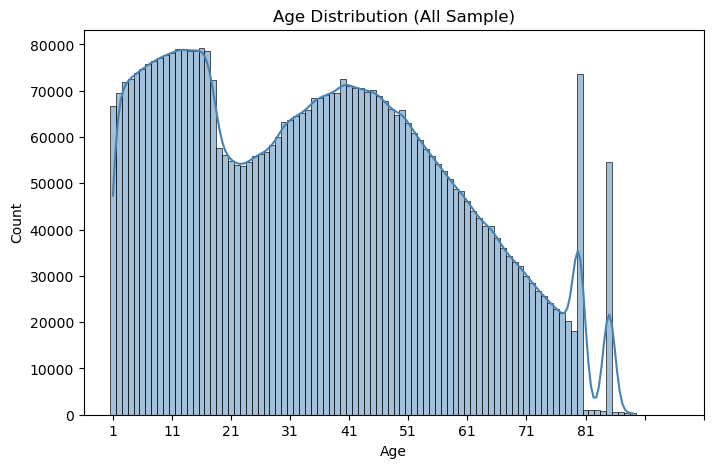

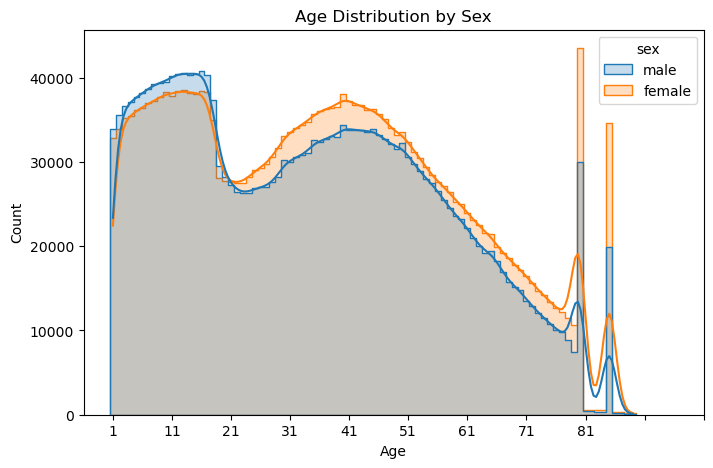

In [63]:
# Age distribution.
plt.figure(figsize=(8,5))
sns.histplot(df, x="age", bins=30, color="steelblue", kde=True)
plt.title("Age Distribution (All Sample)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(np.arange(0, 101, 10))
plt.show()

# Age distribution by gender. 
plt.figure(figsize=(8,5))
sns.histplot(df, x="age", hue="sex", bins=30, kde=True, element="step")
plt.title("Age Distribution by Sex")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(np.arange(0, 101, 10))
plt.show()

## 🌎 Racial Composition

This section visualizes the racial composition of the CPS dataset to provide an overview of population diversity.

### 🔹 What was done
Two bar plots were generated:
1. **Racial Composition (Full List)** — shows the count of all race categories in the dataset, sorted by frequency.  
2. **Racial Composition (Top 10 + Others)** — focuses on the ten largest racial groups while grouping all minor categories into an “Other” group to improve readability.

### 🔹 Key observations
- The dataset is **heavily dominated by White and Black individuals**, together accounting for the vast majority of the sample.  
- Other groups such as **Asian**, **American Indian**, and **Pacific Islander** appear in much smaller proportions.  
- Many detailed multi-race combinations have very few observations, which is why aggregating them under “Other” improves visualization clarity.

### 💡 Takeaway
The CPS dataset’s racial composition mirrors U.S. population structure, where White and Black groups are predominant.  
This distribution provides useful context when analyzing wage gaps, employment rates, or education outcomes across racial lines.

/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_55815/698050011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="race", data=df, palette="viridis", order=df['race'].value_counts().index)


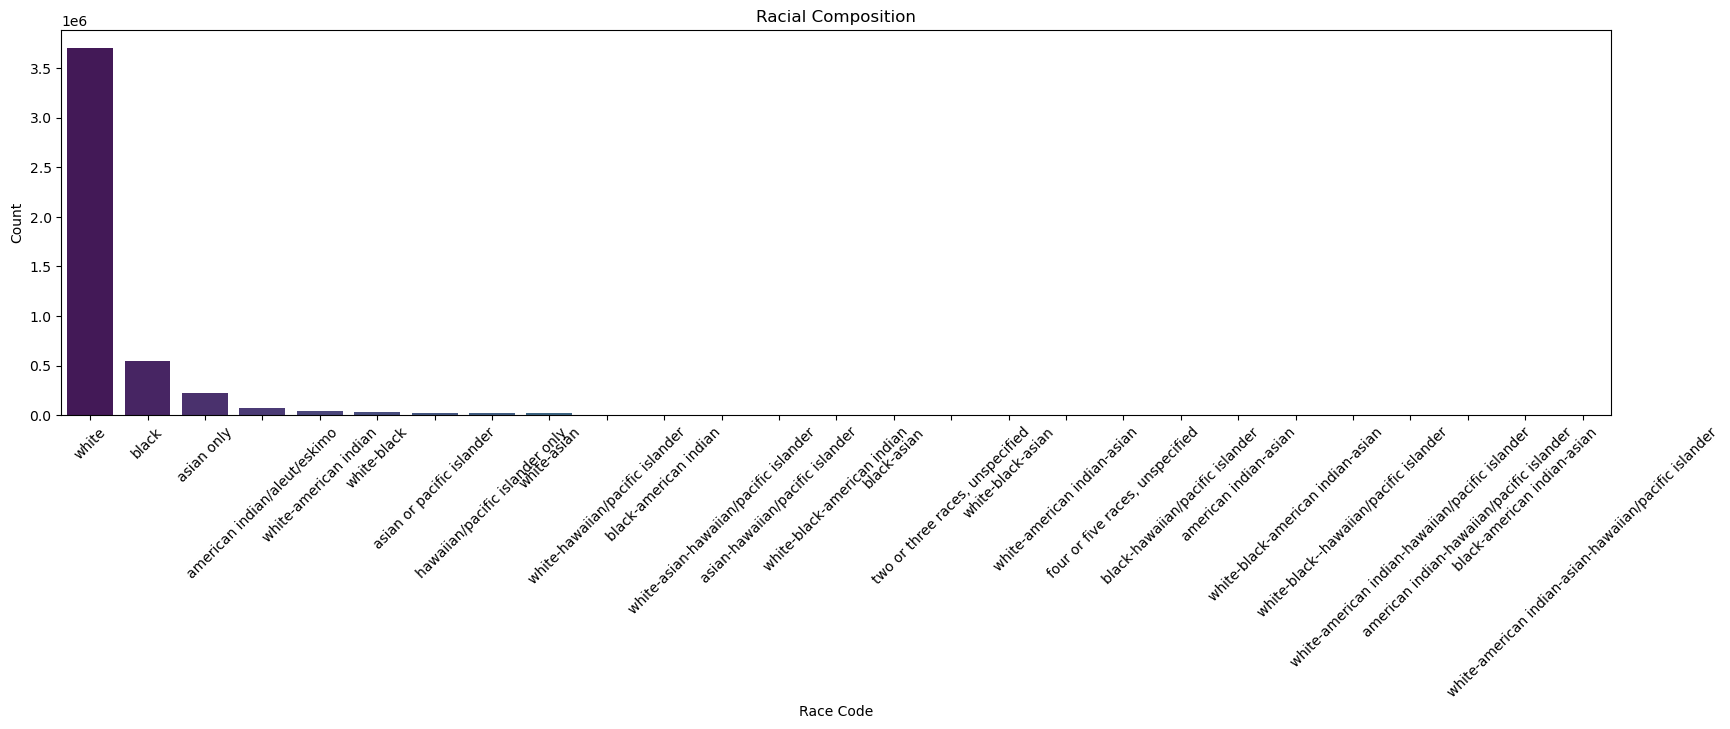

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(x="race", data=df, palette="viridis", order=df['race'].value_counts().index)
plt.title("Racial Composition")
plt.xlabel("Race Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_55815/3738979844.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


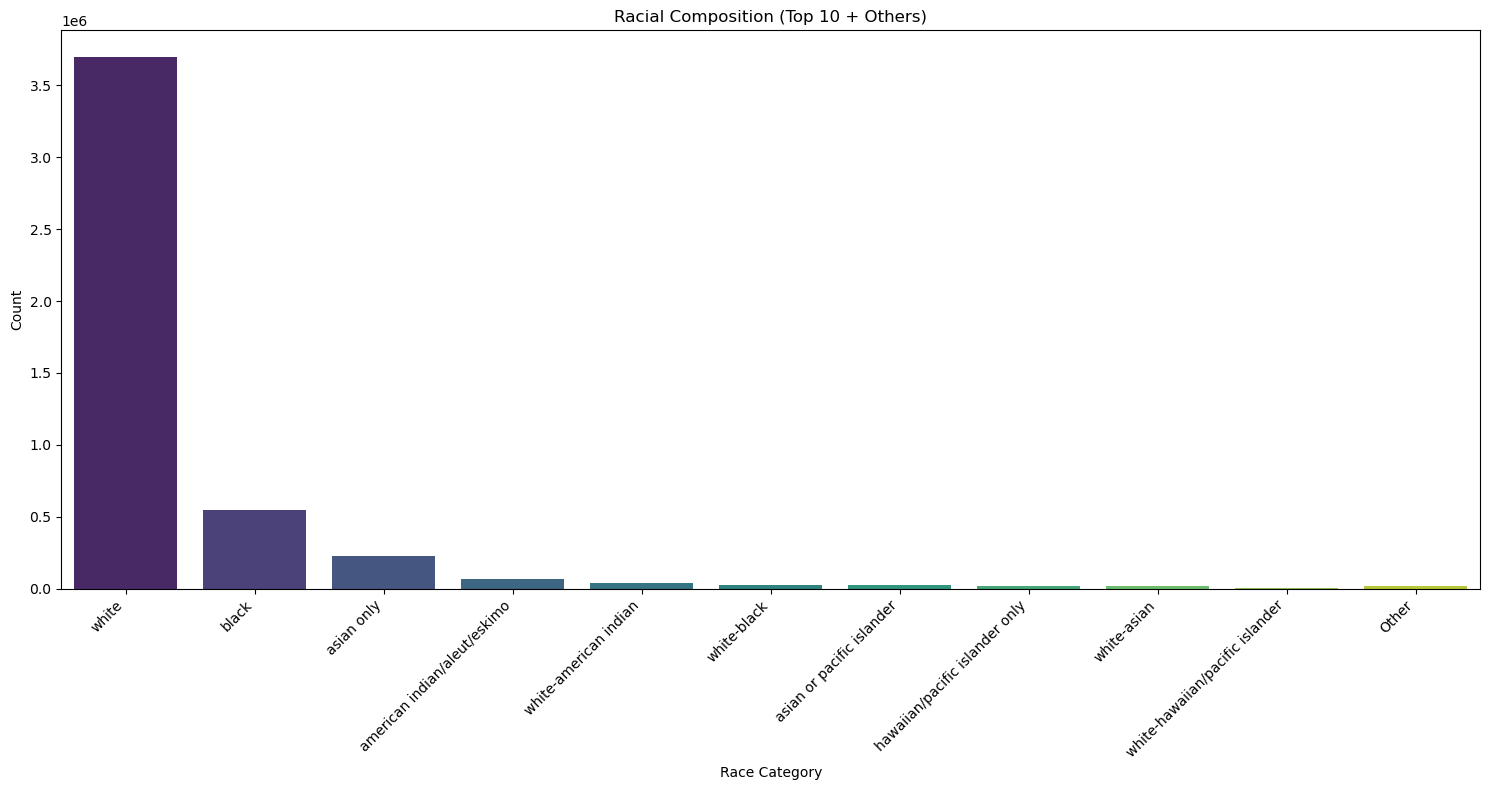

In [65]:
# Select top 10
top_n = 10 

# Order by frequency
race_counts = df['race'].value_counts()
top_races = race_counts.head(top_n).index.tolist()

# 'race_group' established
# Those out of top 10 become 'Other'
df['race_grouped'] = df['race'].apply(lambda x: x if x in top_races else 'Other')

# Calculate value accounts.
race_order = df['race_grouped'].value_counts().index.tolist()
if 'Other' in race_order and race_order[-1] != 'Other':
    race_order.remove('Other')
    race_order.append('Other')

# Visualization
plt.figure(figsize=(15, 8)) 

sns.countplot(
    x='race_grouped',
    data=df,
    palette='viridis',
    order=race_order 
)

plt.title('Racial Composition (Top {} + Others)'.format(top_n))
plt.xlabel('Race Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## 🚻 Gender Composition

This pie chart visualizes the gender distribution within the CPS dataset.

### 🔹 What was done
A simple pie chart was created using the `sex` variable to illustrate the proportion of male and female respondents in the sample.

### 🔹 Key observations
- The dataset shows a **near-even gender split**, with **females slightly outnumbering males** (around 51% vs. 49%).  
- This balance suggests the sample is broadly representative of the U.S. population in terms of gender composition.  

### 💡 Takeaway
The nearly equal gender distribution ensures that any subsequent labor market or wage analysis will not be heavily biased toward one gender group.

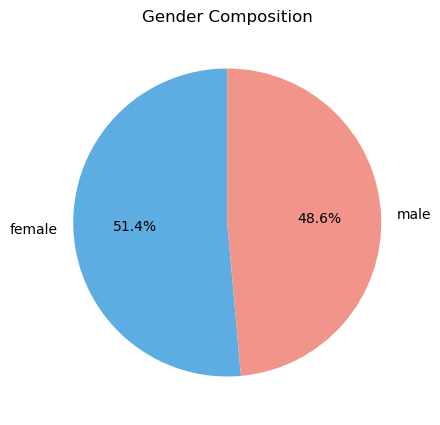

In [54]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=["#5DADE2", "#F1948A"])
plt.title("Gender Composition")
plt.show()

## 🗺️ Regional Distribution

This chart illustrates the number of observations in the CPS dataset by U.S. region.

### 🔹 What was done
A bar chart was created using the `region` variable to show how sample sizes vary across the nine Census divisions. Each bar represents a region, ordered alphabetically for clarity.

### 🔹 Key observations
- The **East South Central** and **Pacific** divisions have the largest representation in the dataset.  
- Smaller sample sizes are observed in regions like **West South Central**, reflecting natural differences in population and survey coverage.  
- The distribution overall appears **reasonably balanced**, ensuring good geographic representation for empirical analysis.

### 💡 Takeaway
Regional coverage in the CPS data is broad and fairly proportional to U.S. population distribution, providing a solid foundation for comparing labor market outcomes across regions.

/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_95362/3999548126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="crest")


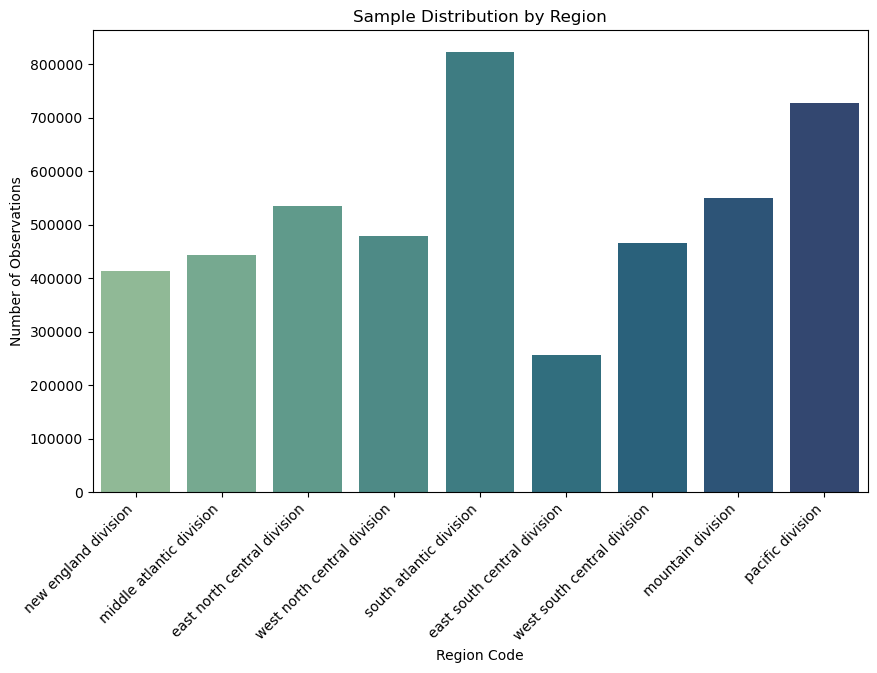

In [15]:
plt.figure(figsize=(10,6))
region_counts = df['region'].value_counts().sort_index()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="crest")
plt.title("Sample Distribution by Region")
plt.xlabel("Region Code")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45, ha='right')
plt.show()

## 💼 Employment Status Distribution

This visualization shows the distribution of individuals by employment status using the `wkstat` variable.

### 🔹 What was done
A horizontal bar chart was created to display counts for different work status categories, distinguishing full-time, part-time, and unemployed individuals.

### 🔹 Key observations
- The majority of respondents are **full-time workers (35+ hours per week)**, forming the largest category by a wide margin.  
- **Part-time employment** accounts for a smaller yet noticeable portion, often for non-economic reasons (e.g., personal choice).  
- **Unemployment and non-labor force** categories represent a minor share of the sample, indicating strong labor force participation.

### 💡 Takeaway
The dataset reveals a labor market dominated by full-time employment, consistent with macroeconomic trends in stable job markets.  
This structure provides a strong baseline for analyzing wage differences, working hours, and transitions between full-time and part-time work.

/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_95362/980194157.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wkstat_counts, x='count', y='wkstat', palette='Blues_r')


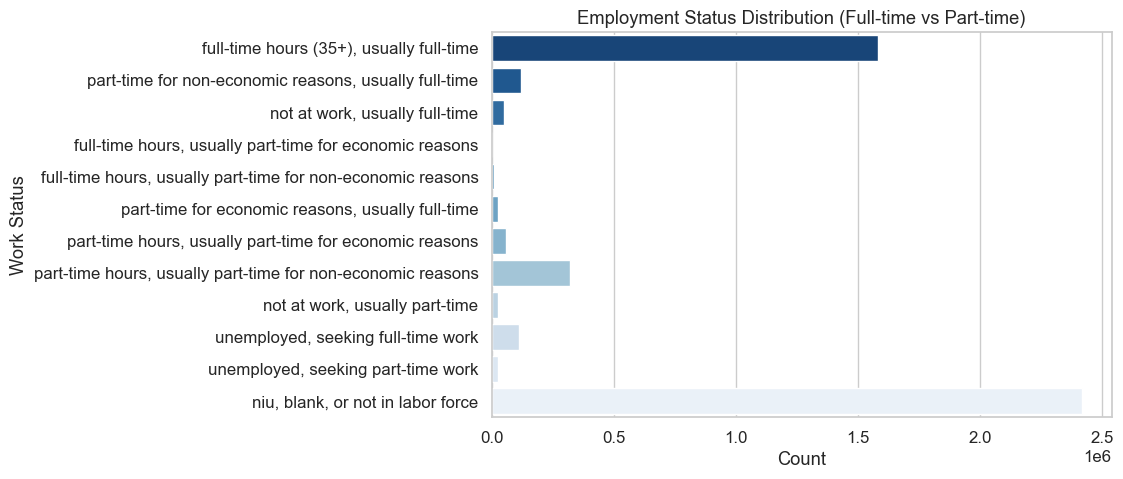

In [ ]:

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8,5)
df = pd.read_stata("/Users/quentingao/Library/CloudStorage/OneDrive-TulaneUniversity/R_or_Python/Markdown/labor_economic_aces.dta")

# -------------------------
# 1️⃣ full-time v.s. part-time
# -------------------------
wkstat_counts = df['wkstat'].value_counts().reset_index()
wkstat_counts.columns = ['wkstat', 'count']

sns.barplot(data=wkstat_counts, x='count', y='wkstat', palette='Blues_r')
plt.title("Employment Status Distribution (Full-time vs Part-time)")
plt.xlabel("Count")
plt.ylabel("Work Status")
plt.show()



In [ ]:
 df['uhrsworkt'].value_counts().reset_index()

,uhrsworkt,count
0,niu,2554314
1,40,1076514
2,hours vary,168604
3,50,139452
4,45,85270
...,...,...
159,122,1
160,143,1
161,142,1
162,141,1


In [22]:
df['uhrsworkt'] = pd.to_numeric(df['uhrsworkt'], errors='coerce')

## ⏰ Weekly Working Hours

This plot illustrates the distribution of weekly hours worked among individuals in the sample.

### 🔹 What was done
A violin plot was created using the `uhrsworkt` variable to visualize the density and variation in weekly working hours.  
The plot highlights how work hours cluster around common benchmarks such as part-time and full-time levels.

### 🔹 Key observations
- The distribution is **heavily concentrated around 40 hours per week**, consistent with the standard full-time work schedule.  
- A smaller density is observed for those working fewer than 30 hours, likely representing **part-time or flexible work arrangements**.  
- Very few individuals report working beyond 60 hours weekly, indicating **limited prevalence of overtime or extreme workloads**.

### 💡 Takeaway
The dataset reflects a labor market dominated by full-time employment, with a relatively small share of part-time and overtime workers.  
This clean clustering around 40 hours per week provides a strong foundation for studying the effects of work intensity on wages or well-being.

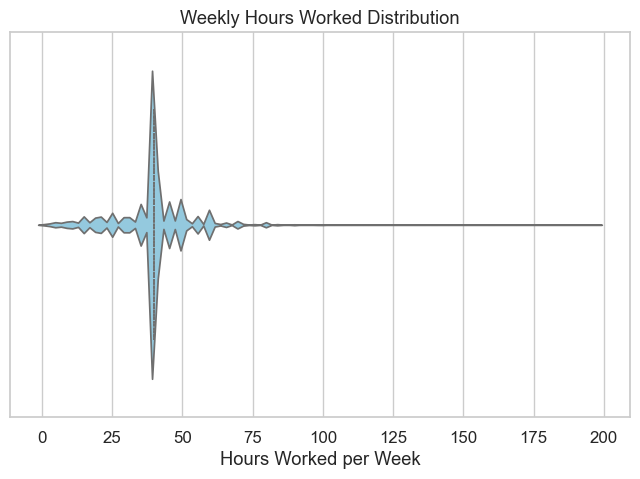

In [ ]:
# -------------------------
# 2️⃣ weekly working hours
# -------------------------
sns.violinplot(data=df, x="uhrsworkt", inner="quartile", color="skyblue")
plt.title("Weekly Hours Worked Distribution")
plt.xlabel("Hours Worked per Week")
plt.show()


## 📉 Reasons for Unemployment

This visualization explores the main self-reported reasons for unemployment in the dataset.

### 🔹 What was done
A horizontal bar chart was created using the `whyunemp` variable to highlight the most common causes of unemployment.  
The top categories were extracted and plotted for clearer interpretation.

### 🔹 Key observations
- The largest groups are **job losers** (including layoffs and other involuntary separations), reflecting cyclical or structural job losses.  
- **Re-entrants** and **new entrants** make up a notable portion of the unemployed, indicating ongoing labor market churn and entry dynamics.  
- **Job leavers** and those whose **temporary jobs ended** represent smaller, more voluntary transitions.  

### 💡 Takeaway
Unemployment in this sample is primarily **involuntary**, dominated by layoffs and job losses, while a smaller share stems from voluntary transitions or new labor market entrants.  
This distinction is crucial for policy and welfare analyses focused on unemployment insurance or job re-entry programs.

In [ ]:
# -------------------------
# 6️⃣ top 10 unemployment reason
# -------------------------
df_niu = df[df['whyunemp'] != 'niu']
whyunemp_top10 = df_niu['whyunemp'].value_counts().reset_index()
whyunemp_top10.columns = ['Reason', 'Count']
whyunemp_top10.head()


,Reason,Count
0,other job loser,39437
1,re-entrant,37558
2,job loser - on layoff,21412
3,temporary job ended,13268
4,job leaver,12111


In [40]:
whyunemp_top10.value_counts().reset_index()

,Reason,Count,count
0,niu,0,1
1,job loser - on layoff,21412,1
2,other job loser,39437,1
3,temporary job ended,13268,1
4,job leaver,12111,1
5,re-entrant,37558,1
6,new entrant,11555,1


/var/folders/bt/159y_h211qb_80xw9cxg53rw0000gn/T/ipykernel_95362/180792059.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=whyunemp_top10, y='Reason', x='Count', palette='coolwarm')


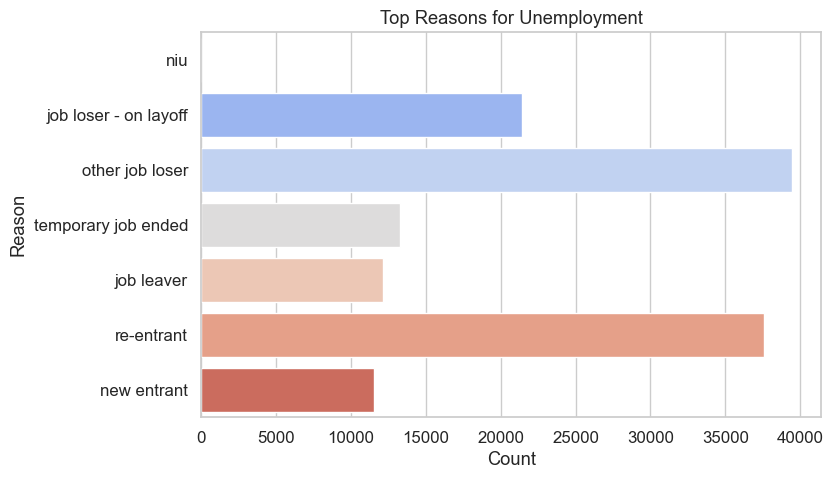

In [38]:
sns.barplot(data=whyunemp_top10, y='Reason', x='Count', palette='coolwarm')
plt.title("Top Reasons for Unemployment")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()